In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Walmart_Data_Analysis_and_Forcasting.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## EDA

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
type(df['Date'][0])

str

### Converting to datetime format

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# time coverage
print(df['Date'].min(), "→", df['Date'].max())
print("Unique weeks:", df['Date'].nunique())

2010-02-05 00:00:00 → 2012-10-26 00:00:00
Unique weeks: 143


### Weekly_Sales visualization

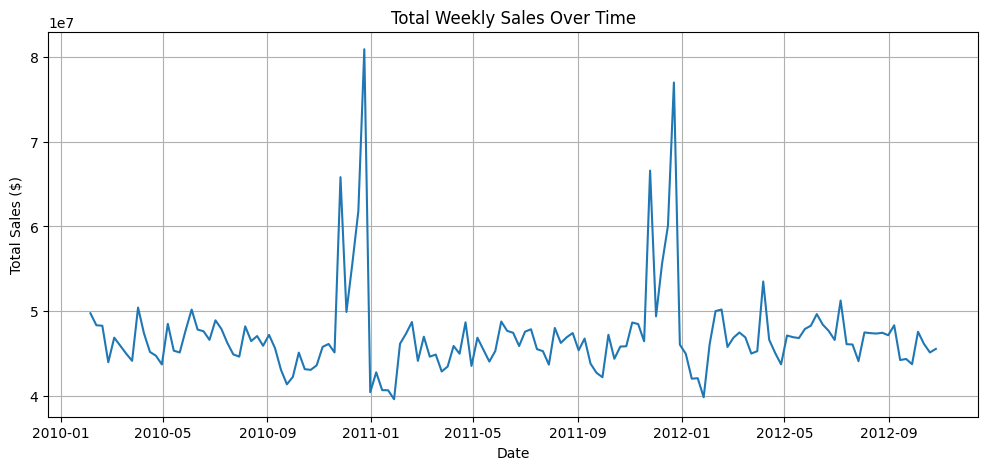

In [12]:
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,5))
plt.plot(sales_over_time['Date'], sales_over_time['Weekly_Sales'])
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

### Holiday vs. Non-Holiday Weeks

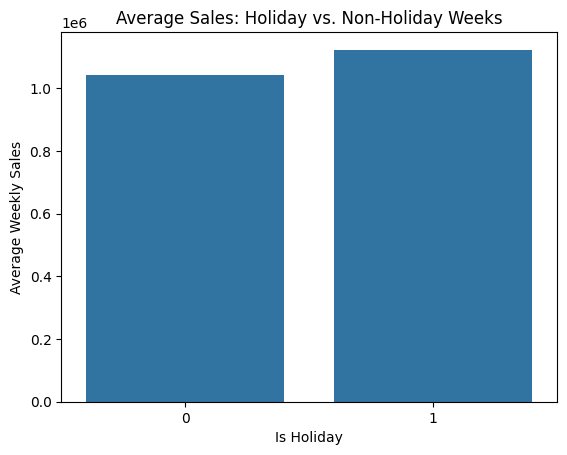

In [13]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title("Average Sales: Holiday vs. Non-Holiday Weeks")
plt.xlabel("Is Holiday")
plt.ylabel("Average Weekly Sales")
plt.show()

### Average Sales / store

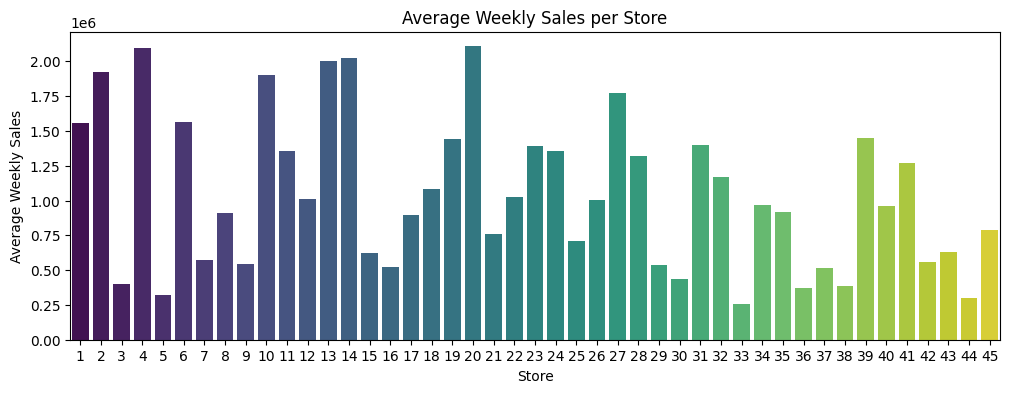

In [14]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()


### Distribution of sales per store

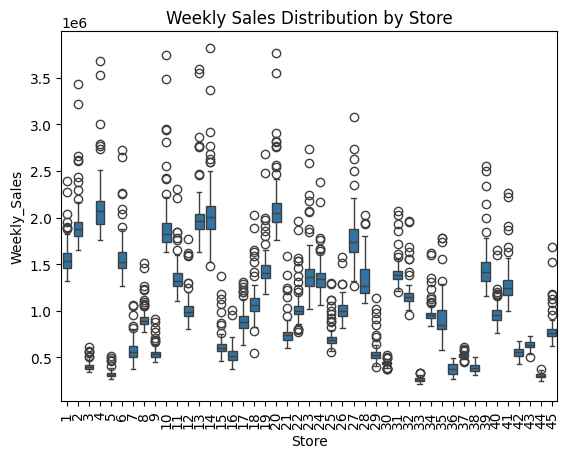

In [15]:
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title("Weekly Sales Distribution by Store")
plt.xticks(rotation=90)
plt.show()

### External Factors vs. Sales

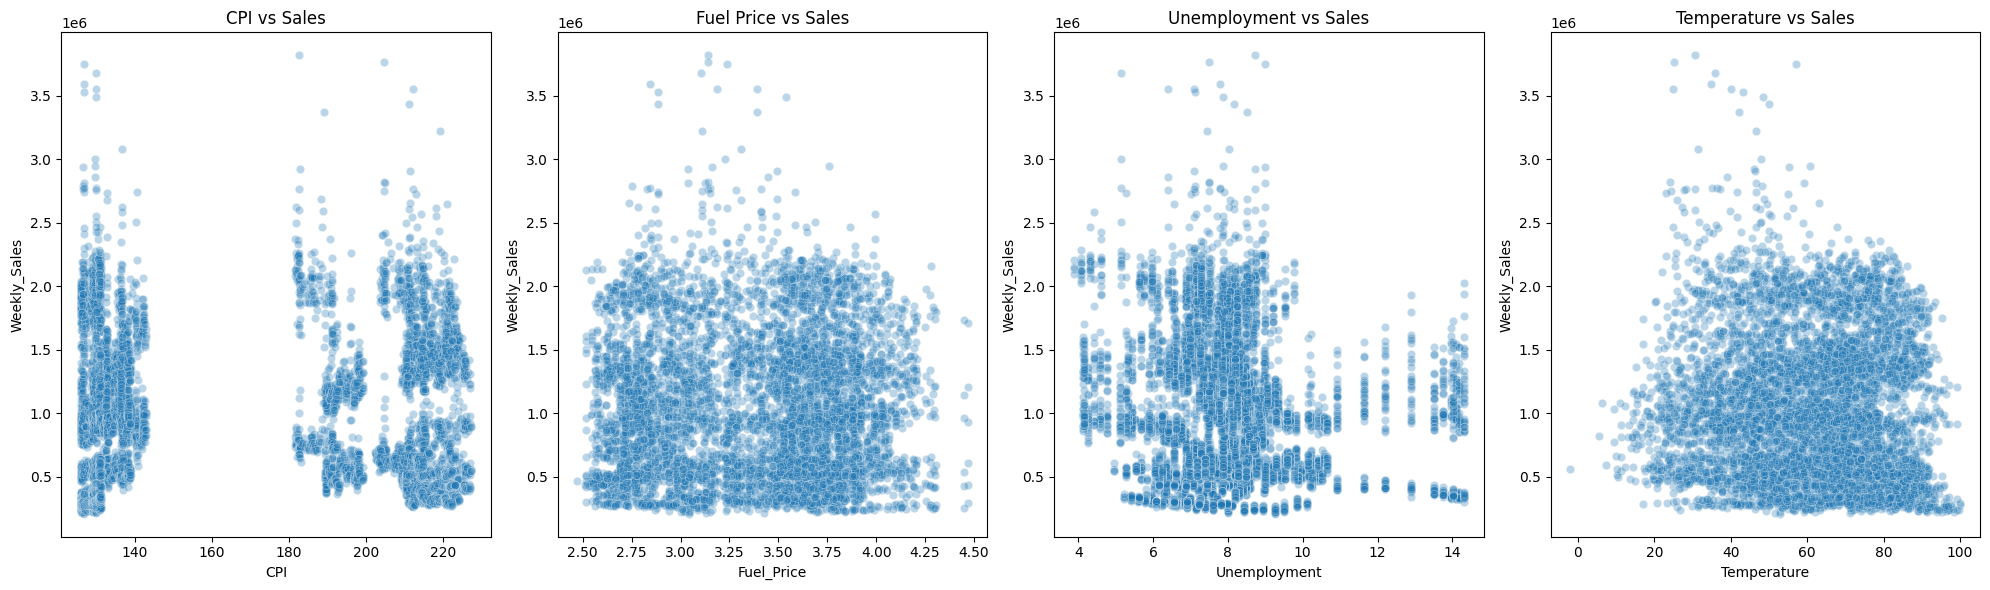

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(20,6))
sns.scatterplot(ax=axes[0], x='CPI', y='Weekly_Sales', data=df, alpha=0.3)
sns.scatterplot(ax=axes[1], x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.3)
sns.scatterplot(ax=axes[2], x='Unemployment', y='Weekly_Sales', data=df, alpha=0.3)
sns.scatterplot(ax=axes[3], x='Temperature', y='Weekly_Sales', data=df, alpha=0.3)
axes[0].set_title("CPI vs Sales")
axes[1].set_title("Fuel Price vs Sales")
axes[2].set_title("Unemployment vs Sales")
axes[3].set_title("Temperature vs Sales")
plt.tight_layout()
plt.show()

### Weekly & Monthly Patterns

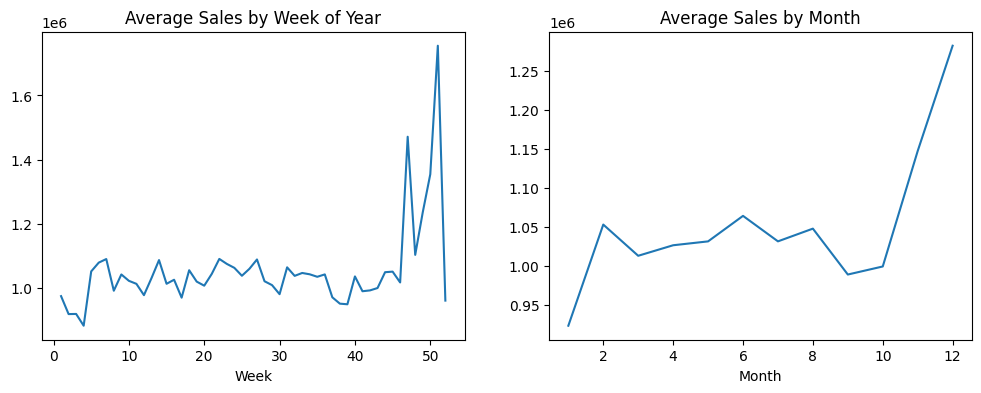

In [17]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

weekly_sales = df.groupby('Week')['Weekly_Sales'].mean()
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, ax=ax[0])
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax[1])
ax[0].set_title("Average Sales by Week of Year")
ax[1].set_title("Average Sales by Month")
plt.show()

### Correlation Matrix & Heatmap

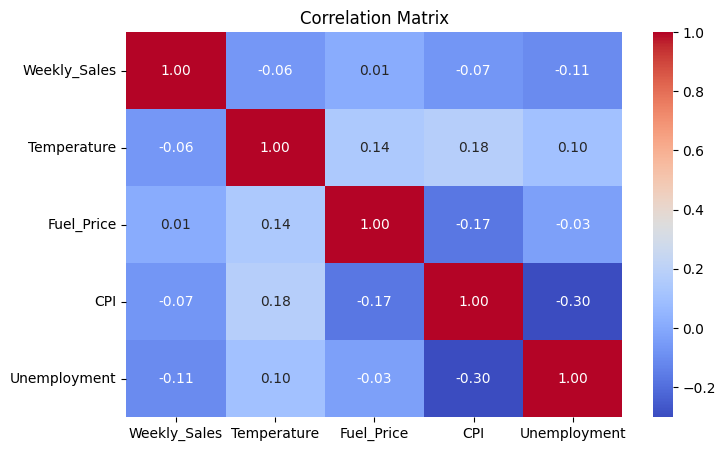

Weekly_Sales    1.000000
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64

In [18]:
numeric_df = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
corr = numeric_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

corr['Weekly_Sales'].sort_values(ascending=False)

### Checking for irregular time interval

In [19]:
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

In [20]:
df.groupby('Store')['Date'].diff().value_counts()

Date
7 days    6390
Name: count, dtype: int64

### Testing for Stationarity
Checking stationarity to check if ARIMA models can be used.<br>
H0: The series has a unit root (non-stationary).<br>
H1: The series is stationary.<br>
<em>Checking stationarity and ACF to check if ARIMA process can be used.</em>

Testing using : 
1. Rolling mean
2. ADF test
3. Auto-correlation


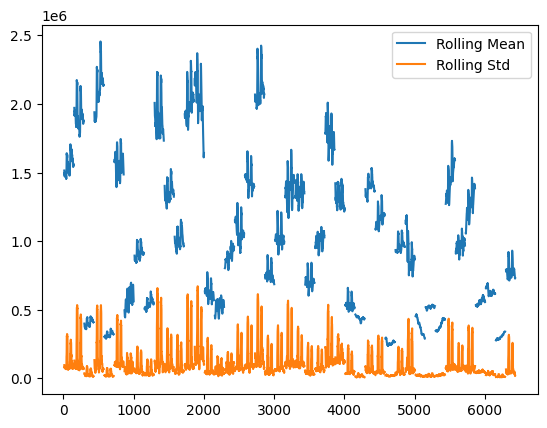

In [21]:
df['Rolling_Mean'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(12).mean()).plot(label='Rolling Mean')
df['Rolling_Std'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(12).std()).plot(label='Rolling Std')
plt.legend()

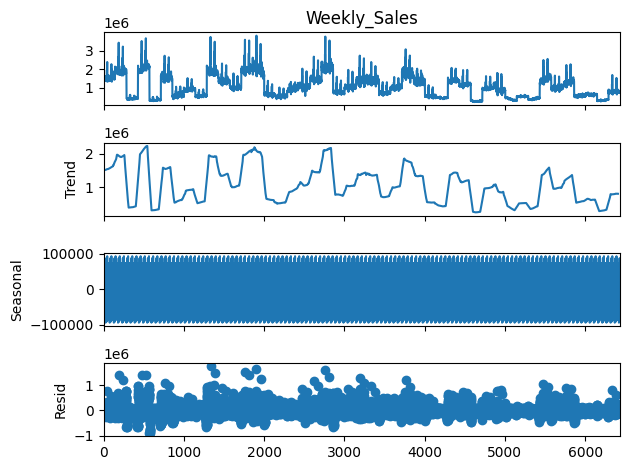

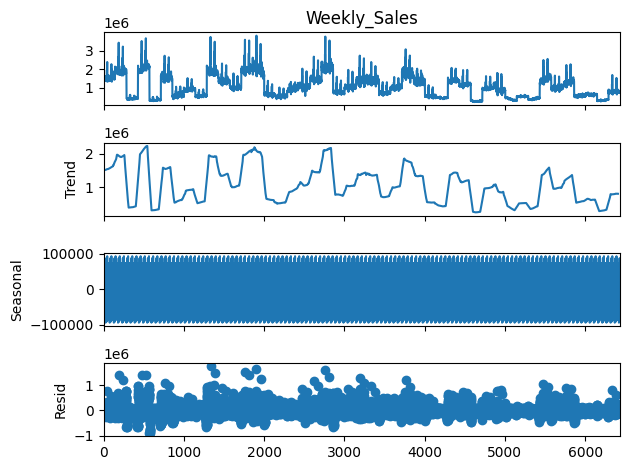

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df['Weekly_Sales'], model='additive', period=52).plot()

<Axes: xlabel='Weekly_Sales'>

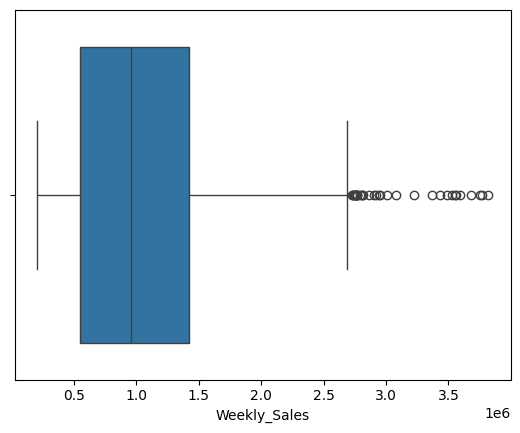

In [23]:
sns.boxplot(x=df['Weekly_Sales'])

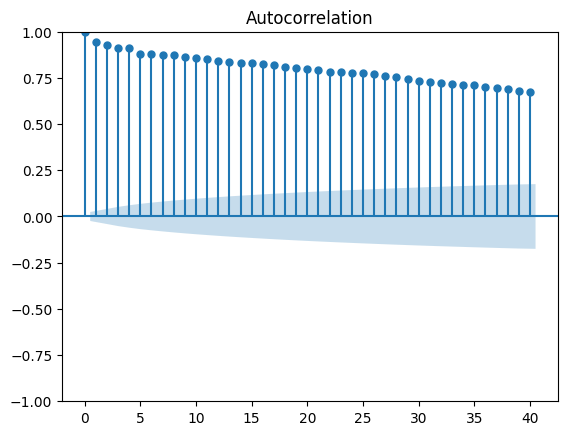

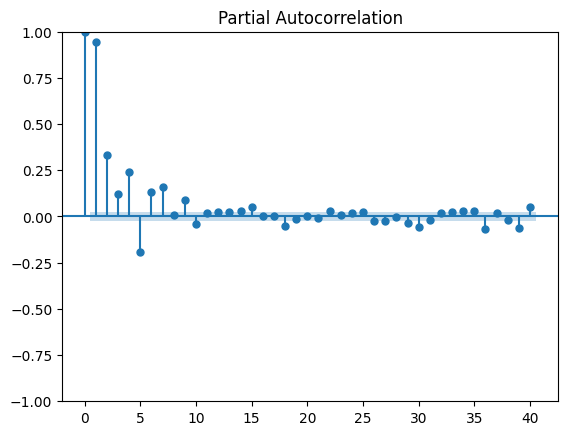

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Weekly_Sales'], lags=40)
plot_pacf(df['Weekly_Sales'], lags=40)
plt.show()

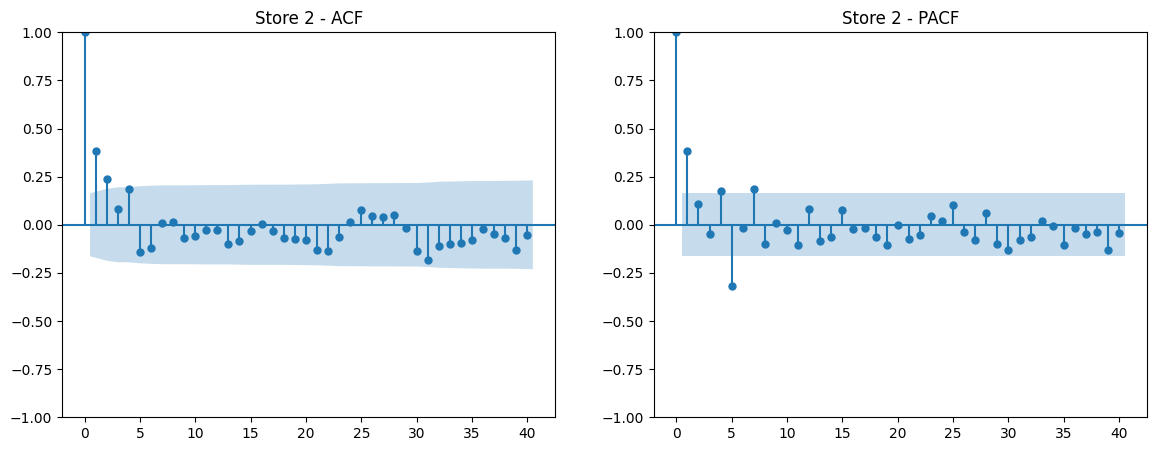

In [31]:
store_id = 2
store_df = df[df['Store'] == store_id].set_index('Date').sort_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(store_df['Weekly_Sales'], lags=40, ax=ax[0])
plot_pacf(store_df['Weekly_Sales'], lags=40, ax=ax[1])
ax[0].set_title(f'Store {store_id} - ACF')
ax[1].set_title(f'Store {store_id} - PACF')
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Weekly_Sales'])[4]

{'1%': -3.4313721757424656,
 '5%': -2.8619917128968813,
 '10%': -2.5670104435791017}

In [42]:
avg_p = []
one_level = []
five_level = []
ten_level = []
for store, subset in df.groupby('Store'):
    result = adfuller(subset['Weekly_Sales_Scaled'])
    print(f"Store {store}: p-value = {result[1]:.4f}")
    avg_p.append(result[1])
    one_level.append(result[4]['1%'])
    five_level.append(result[4]['5%'])
    ten_level.append(result[4]['10%'])

Store 1: p-value = 0.0000
Store 2: p-value = 0.0040
Store 3: p-value = 0.0475
Store 4: p-value = 0.1936
Store 5: p-value = 0.0003
Store 6: p-value = 0.0000
Store 7: p-value = 0.0003
Store 8: p-value = 0.0038
Store 9: p-value = 0.0000
Store 10: p-value = 0.0083
Store 11: p-value = 0.0033
Store 12: p-value = 0.0000
Store 13: p-value = 0.0000
Store 14: p-value = 0.1227
Store 15: p-value = 0.0000
Store 16: p-value = 0.0002
Store 17: p-value = 0.0000
Store 18: p-value = 0.0079
Store 19: p-value = 0.0000
Store 20: p-value = 0.0000
Store 21: p-value = 0.0000
Store 22: p-value = 0.0000
Store 23: p-value = 0.0000
Store 24: p-value = 0.0000
Store 25: p-value = 0.0000
Store 26: p-value = 0.0000
Store 27: p-value = 0.0000
Store 28: p-value = 0.0446
Store 29: p-value = 0.0000
Store 30: p-value = 0.1635
Store 31: p-value = 0.0717
Store 32: p-value = 0.0000
Store 33: p-value = 0.0020
Store 34: p-value = 0.0057
Store 35: p-value = 0.0024
Store 36: p-value = 0.9822
Store 37: p-value = 0.0119
Store 38: 

In [44]:
import numpy as np
print(f"Average p-value across stores: {np.mean(avg_p):.4f}")
print(f"Average 1% signficance level: {np.mean(one_level):.4f}")
print(f"Average 5% signficance level: {np.mean(five_level):.4f}")
print(f"Average 10% signficance level: {np.mean(ten_level):.4f}")

Average p-value across stores: 0.0873
Average 1% signficance level: -3.4792
Average 5% signficance level: -2.8829
Average 10% signficance level: -2.5782


## Interpretaion
ADF Statistic = -4.624<br>
-At 1% level: -3.43<br>
-At 5% level: -2.86<br>
-At 10% level: -2.57<br>
ADF < -3.43 thus lower than all values BUT THIS VALUE IS FOR ALL THE STORES TOGETHER IN THE SAME TIME PERIOD.<br> THEREFORE THIS IS A MISLEADING INDICATOR AND p value for all stores is calulated seperately and then we find the average p value and use that for ADF test.<br>
For all stores seperately average p_value = 0.873> 1% ,5%, 10% significance level.
THUS H1 is rejected and H0 is accepted. There is strong evidence against stationary. <br>
The graphs shows no seasonality + moderate trends + noisy + outliers. Outliers can be explained by seasonality during holiday seasons.<br>
Due to no proof of auto correlation, non-stationarity, lack of data points ARIMA cannot be used.<br>


### Using box-cox transformation for treatment of outliers without removing the impact of seasonality.

In [26]:
from scipy.stats import boxcox
df['Weekly_Sales_Scaled'], _ = boxcox(df['Weekly_Sales'] + 1)

In [27]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Rolling_Mean,Rolling_Std,Weekly_Sales_Scaled
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,"Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)",175.399049
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010,"Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)",175.347784
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010,"Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)",174.454576
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010,"Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)",168.091198
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010,"Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)",172.717963


In [28]:
df.to_csv('cleaned_data.csv', index=True)

## Conclusion
The data is stationary, low autocorrelation with ouliers. Box-Cox transformation has been applied to mitigate the effect of the outliers.<br>
Due to lack of enough data points for each store and low autocorrelation we cannot use ARIMA models. <br>  
Models to be used:
- LSTM 
- Ensembling models - Random forest & XGBoost

